In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [8]:
df = pd.read_csv('dataset_bps_14.csv', sep=',')
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
0,-1.41,-1.80,-1.66,-1.66,-1.66,-1.66,-1.19,-0.76,-1.19,-1.41,-1.80,-1.66,-1.19,-1.66,0
1,-1.66,-0.76,-1.19,-1.66,-1.80,-2.75,-2.75,-1.41,-1.66,-1.13,-1.80,-1.19,-1.66,-1.66,0
2,-1.66,-1.66,-1.19,-1.80,-2.75,-1.41,-1.19,-0.76,-1.13,-1.35,-0.76,-1.13,-1.80,-1.35,0
3,-1.41,-1.66,-1.13,-1.35,-1.41,-1.80,-1.13,-1.35,-1.80,-1.41,-1.19,-0.76,-1.13,-1.35,0
4,-1.35,-1.66,-0.76,-1.19,-1.66,-1.66,-1.80,-1.41,-1.35,-1.41,-1.19,-0.76,-1.13,-1.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,-0.76,-1.13,-1.35,-0.76,-1.13,-2.75,-2.75,-2.75,-2.75,-2.75,-1.80,-1.35,-1.13,-0.76,1
768,-0.76,-1.13,-1.35,-1.80,-2.75,-2.75,-2.75,-2.75,-2.75,-1.13,-0.76,-1.35,-1.13,-0.76,1
769,-0.76,-1.13,-1.35,-1.80,-2.75,-2.75,-2.75,-2.75,-2.75,-2.75,-1.41,-1.35,-1.13,-0.76,1
770,-0.76,-1.13,-1.35,-1.41,-2.75,-2.75,-2.75,-2.75,-2.75,-2.75,-1.80,-1.35,-1.13,-0.76,1


In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [10]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred = rf_classifier.predict(X_test)

Accuracy: 0.7290322580645161
Confusion matrix:
[[65 22]
 [20 48]]
Precision: 0.7252100840336134
Recall: 0.7265043948613928
F1-Score: 0.7257330637007078


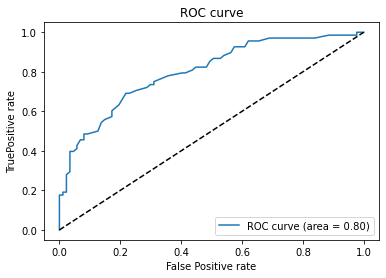

In [12]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Precision
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1-Score:", f1)

# ROC
y_scores = rf_classifier.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

# ROC plot
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive rate')
plt.ylabel('TruePositive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()